<a href="https://colab.research.google.com/github/NimraMushtaq/ml-projects/blob/master/Potato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Set the path to your Kaggle API key
kaggle_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/Kaggle key/kaggle.json"

# Create the .kaggle directory and copy the API key
!mkdir -p ~/.kaggle
!cp "{kaggle_path}" ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
# Loading dataset from kaggle
!kaggle datasets download -d faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-dataset.zip', 'r')
zip_ref.extractall('/content/potato-dataset')
zip_ref.close()

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras

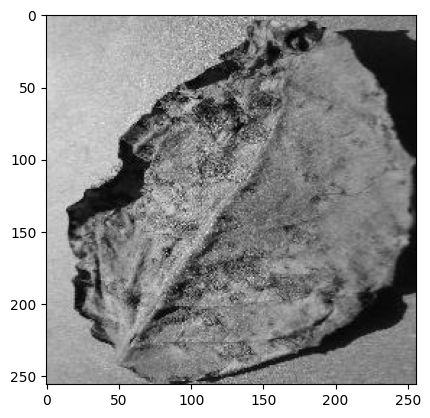

In [ ]:
DATADIR = "/content/potato-dataset"    #base dir
CATEGORIES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

In [ ]:
# grayscale image consumes less memory
print(img_array)

[[171 182 192 ... 109 114 134]
 [190 195 196 ... 125 122 136]
 [193 193 191 ... 122 115 124]
 ...
 [156 158 160 ... 124 123 122]
 [156 158 161 ... 125 127 129]
 [152 155 159 ... 125 128 133]]


In [ ]:
img_array.shape

(256, 256)

In [ ]:
# TRAINING DATA
training_data = []
IMG_SIZE = 256

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    # adding labels to each category
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        # All images may not be of same size so we need to resize all images to 256
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   #resizing images
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
print(len(training_data))

2152


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
# image data
X = []
# labels
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
type(X), type(y)

(list, list)

In [ ]:
# Covert list to array
# last value '3' for 'color image'
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# Scale the value from 0 to 255 to 0 to 1
X = X/255

In [ ]:
# Building CNN Model
model = keras.Sequential([
    # Convolution Layer 1
    keras.layers.Conv2D(64, kernel_size = (3,3), input_shape = X.shape[1:], activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    # Convolution Layer 2
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    # Flattening Layer
    keras.layers.Flatten(),

    # Hidden Layer 1
    keras.layers.Dense(64, activation = 'relu'),

    # Output Layer
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 412s 7s/step - accuracy: 0.4993 - loss: 1.1881 - val_accuracy: 0.8194 - val_loss: 0.5685
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 414s 7s/step - accuracy: 0.8326 - loss: 0.4938 - val_accuracy: 0.8889 - val_loss: 0.3328
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 407s 7s/step - accuracy: 0.8922 - loss: 0.3076 - val_accuracy: 0.8843 - val_loss: 0.3004
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 451s 7s/step - accuracy: 0.9250 - loss: 0.2152 - val_accuracy: 0.8935 - val_loss: 0.2851
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 434s 7s/step - accuracy: 0.9641 - loss: 0.1105 - val_accuracy: 0.8750 - val_loss: 0.3327
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 396s 6s/step - accuracy: 0.9605 - loss: 0.1075 - val_accuracy: 0.8981 - val_loss: 0.3066
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 454s 7s/step - accuracy: 0.9800 - loss: 0.0727 - val_accuracy: 0.8935 - val_loss: 0.3473
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 440s 7s/step - accuracy: 0.9818 - loss: 0.0632 - val_accuracy: 0.8889 - v